In [1]:
# Installing all neccessary dependecies
! pip3 install torch torchvision torchaudio

In [2]:
# Importing nececessary libraries
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

In [3]:
# Loading YOLO5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/akshathr/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-19 Python-3.11.5 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
# Model structure
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
# Path to a default image to check YOLO5 models successful run
img = 'https://ultralytics.com/images/zidane.jpg'

In [6]:
# Running img through YOLO5
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1599.2ms pre-process, 129.9ms inference, 8.8ms NMS per image at shape (1, 3, 384, 640)


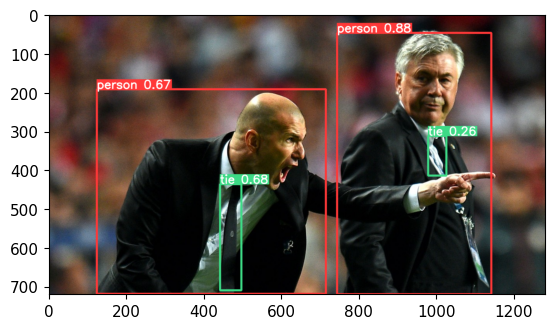

In [7]:
# Printing results
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# Switching on Video Cam to get live video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
# Path to store self made images for training data
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [ ]:
# Collecting my images to feed as training data to model
# Collecting 10 images for awake and drowsy respectively
cap = cv2.VideoCapture(0)

for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        cv2.imwrite(imgname, frame)
        
        cv2.imshow('Image Collection', frame)
        
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [9]:
# Example of a unique id generated to store images
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.0b6d8906-e5d1-11ee-be7e-a684ed581201.jpg


In [10]:
# Printing name and location of the generated images
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.0ba76aae-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba76e0a-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba76f5e-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba7708a-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba77198-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba772b0-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba773fa-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba7753a-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba77652-e5d1-11ee-be7e-a684ed581201.jpg
data/images/awake.0ba77756-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba778be-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba779c2-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba77ac6-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba77bb6-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba77c9c-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba77da0-e5d1-11ee-be7e-a684ed581201.jpg
data/images/drowsy.0ba77e90-e5d1-11ee-be7e-a684ed5

In [13]:
# Loading my custom made YOLO5 model that can detect additional features
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/akshathr/AlgoArena/train/exp2/weights/last.pt')

Using cache found in /Users/akshathr/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-19 Python-3.11.5 torch-2.2.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [14]:
# Path to random image to be used to see the results
img = os.path.join('data', 'images', 'drowsy.7d37e64a-e54e-11ee-90aa-a684ed581201.jpg')

In [15]:
# Running img through the model
results = model(img)

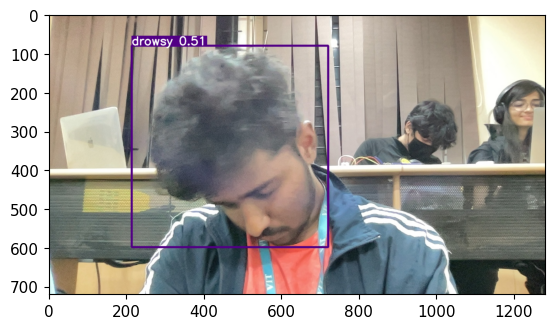

In [16]:
# Printing images
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [54]:
# Capturing live Video feed and throwing alert when asleep
lst=[]
count=0
c=0
sum=0
count1=0
cap = cv2.VideoCapture(0)
avg=[]
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)

    for det in results.pred[0]:
        class_index = int(det[5])
        class_label = results.names[class_index]
        confidence = det[4]
        bbox = det[:4]

        if(class_label=='drowsy'):
            temp=1-confidence
            sum+=temp
        else:
            sum+=confidence
        c+=1
        if(c>90):
            lst.append(sum)
            sum=0
        
        if class_label=='drowsy':
            count+=1
        else:
            count1+=1
        if count1>2:
            count1=0
            count=0
        elif count>5:
            count=0
            os.system("afplay /System/Library/Sounds/Glass.aiff")
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()